                                   BRAINTELS LABS
  *ARTIFICIAL INTELLIGENCE , IMAGE PROCESSING & EMBEDDED SYSTEMS*

Reducción de dimensiones mediante convolución 2D con kernel 1x1 en *TENSORFLOW*

In [63]:
#====USO DE LA CONVOLUION 1x1 PARA REDUCIR LAS DIMENSIONES DE LA ENTRADA DE FORMA NO LINEAL
import tensorflow as tf
import numpy as np
import time
from IPython.display import Image

                                **CONVOLUCION 2D con KERNEL 5x5x48**

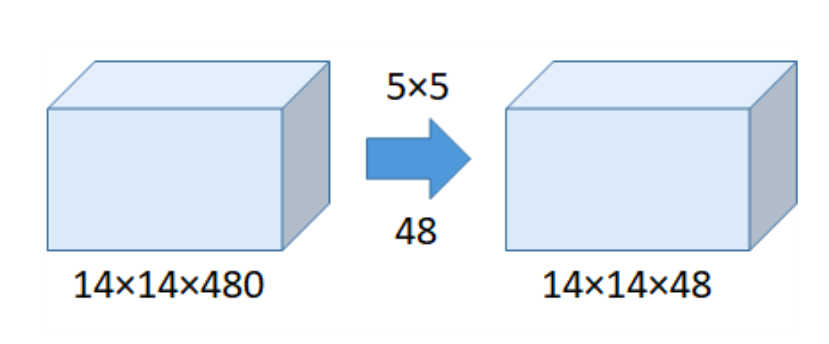

In [64]:
Image(filename="img1.png")

In [65]:
#=============== GRAFO 1, OPERACION DE CONVOLUCION 2D ========
#---------  14x14x480 ==== 5z5z48 ====== 14z14z48
g1=tf.Graph()
with g1.as_default():
    #============================== BATCH,FILAS,COLUMNAS,CANALES_IN ================
    X=tf.random.truncated_normal(shape=(1,14,14,480),mean=0.0,stddev=1.0,name="X")
    print('DIMENSIONES DE ENTRADA',X.shape)
    #============================== FILAS,COLUMNAS,CANALES_IN,CANALES_OUT ================
    kernel=tf.Variable(tf.random.normal(shape=(5,5,480,48),mean=0,stddev=1.0),name='kernel')
    print('DIMENSIONES DEL KERNEL:                    ',kernel.shape)
    Y=tf.nn.conv2d(input=X,filters=kernel,padding="SAME",strides=1,data_format="NHWC",name="Y")
    print('DIMENSIONES DE SALIDA',Y.shape)
#crear sesiones para ejecutar los grafos computacionales
with tf.compat.v1.Session(graph=g1) as sesion:
    sesion.run(tf.compat.v1.global_variables_initializer())
    t1=time.time()
    YGrafo1=sesion.run(Y)
    t2=time.time()
    print('TIEMPO DE CALCULO COMPUTACIONAL EN ms:',int(1000*(t2-t1)))    
   
   

DIMENSIONES DE ENTRADA (1, 14, 14, 480)
DIMENSIONES DEL KERNEL:                     (5, 5, 480, 48)
DIMENSIONES DE SALIDA (1, 14, 14, 48)
TIEMPO DE CALCULO COMPUTACIONAL EN ms: 9


                                **CONVOLUCION 2D con KERNEL 1x1x16 y 5x5x48**


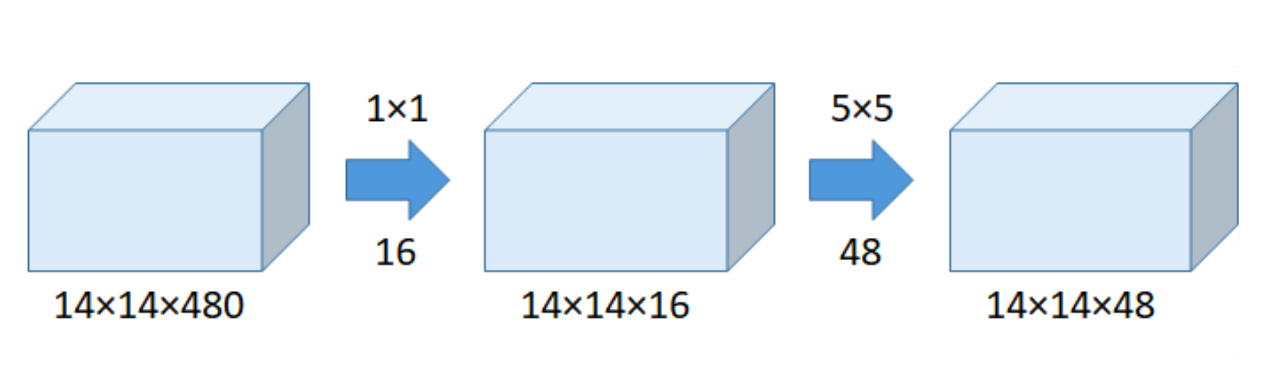

In [66]:
Image(filename="img2.png")

In [67]:

#=============== GRAFO 2, OPERACION DE CONVOLUCION 2D ========
g2=tf.Graph()
with g2.as_default():
    #============================== BATCH,FILAS,COLUMNAS,CANALES_IN ================
    X=tf.random.truncated_normal(shape=(1,14,14,480),mean=0.0,stddev=1.0,name="X")
    print('DIMENSIONES DE ENTRADA',X.shape)
    #===============================FILAS ,COLUMNAS,CANALE_IN,CANALES_OUT ============= CONVOLUCION 1x1
    kernel1=tf.Variable(tf.random.normal(shape=(1,1,480,16),mean=0.0,stddev=1.0),name="kernel1")
    print('DIMENSIONES DEL KERNEL 1:               ',kernel1.shape)
    Y1=tf.nn.conv2d(input=X,filters=kernel1,padding="SAME",strides=1,data_format="NHWC",name="Y1")
    #============================== FILAS,COLUMNAS,CANALES_IN,CANALES_OUT ================ CONVOLUCION 5x5X48
    kernel2=tf.Variable(tf.random.normal(shape=(5,5,16,48),mean=0,stddev=1.0),name='kernel2')
    print('DIMENSIONES DEL KERNEL 2:                ',kernel2.shape)
    Y2=tf.nn.conv2d(input=Y1,filters=kernel2,padding="SAME",strides=1,data_format="NHWC",name="Y2")
    print('DIMENSIONES DE SALIDA',Y2.shape)

with tf.compat.v1.Session(graph=g2) as sesion:
    sesion.run(tf.compat.v1.global_variables_initializer())
    t1=time.time()
    YGrafo2=sesion.run(Y2)
    t2=time.time()
    print('TIEMPO DE CALCULO COMPUTACIONAL EN ms:',int(1000*(t2-t1)))
    

DIMENSIONES DE ENTRADA (1, 14, 14, 480)
DIMENSIONES DEL KERNEL 1:                (1, 1, 480, 16)
DIMENSIONES DEL KERNEL 2:                 (5, 5, 16, 48)
DIMENSIONES DE SALIDA (1, 14, 14, 48)
TIEMPO DE CALCULO COMPUTACIONAL EN ms: 7


================ **BRAINTELS LABS** ============================